<a href="https://colab.research.google.com/github/min9096/202021066-youngmin/blob/main/Colab_%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [40]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [28]:
df = pd.read_csv('/content/Iris.csv')
df = df.drop(columns=['Id'])
X = df.drop(columns=['Species'])
y = df['Species']



In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=158)

# 5. 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. SVM 모델 훈련
model = SVC(kernel='poly', C=3, degree=3)
model.fit(X_train, y_train)

# 7. 예측 및 정확도 출력
y_pred = model.predict(X_test)
print("정확도:", accuracy_score(y_test, y_pred))

정확도: 0.9555555555555556


In [30]:
model = SVC(kernel='poly', degree=3, C=3)
model.fit(X_train, y_train)

SVC(C=3, kernel='poly')

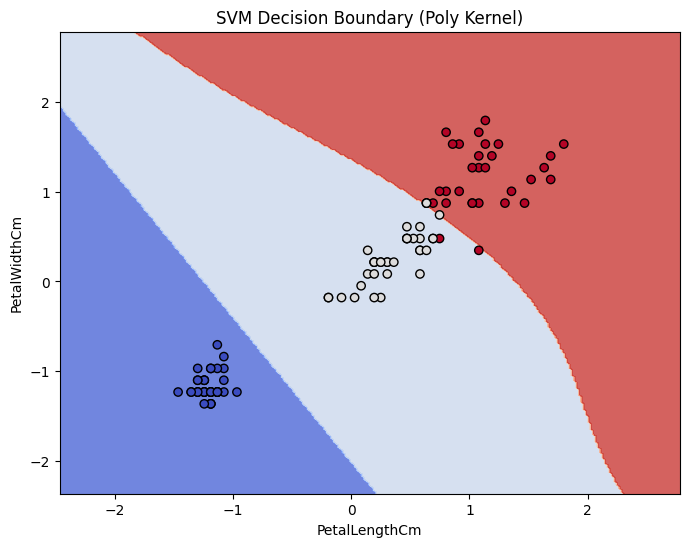

In [33]:

# 2개 feature만 사용
X = df[['PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# 라벨 인코딩
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=158)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ 2개 feature만으로 다시 훈련
model = SVC(kernel='poly', C=3, degree=3)
model.fit(X_train_scaled, y_train)

# 🌈 결정 경계 시각화 함수
def plot_decision_boundary(model, X, y, title="SVM Decision Boundary (Poly Kernel)"):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('PetalLengthCm')
    plt.ylabel('PetalWidthCm')
    plt.title(title)
    plt.show()

# 실행!
plot_decision_boundary(model, X_train_scaled, y_train)


<ipython-input-37-f8c5324a1cb7>:54: UserWarning: Glyph 52964 (\N{HANGUL SYLLABLE KEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-f8c5324a1cb7>:54: UserWarning: Glyph 45328 (\N{HANGUL SYLLABLE NEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-f8c5324a1cb7>:54: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-f8c5324a1cb7>:54: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-f8c5324a1cb7>:54: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-f8c5324a1cb7>:54: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52964 (\N{HANGUL SYLLABLE KEO}) missing from font

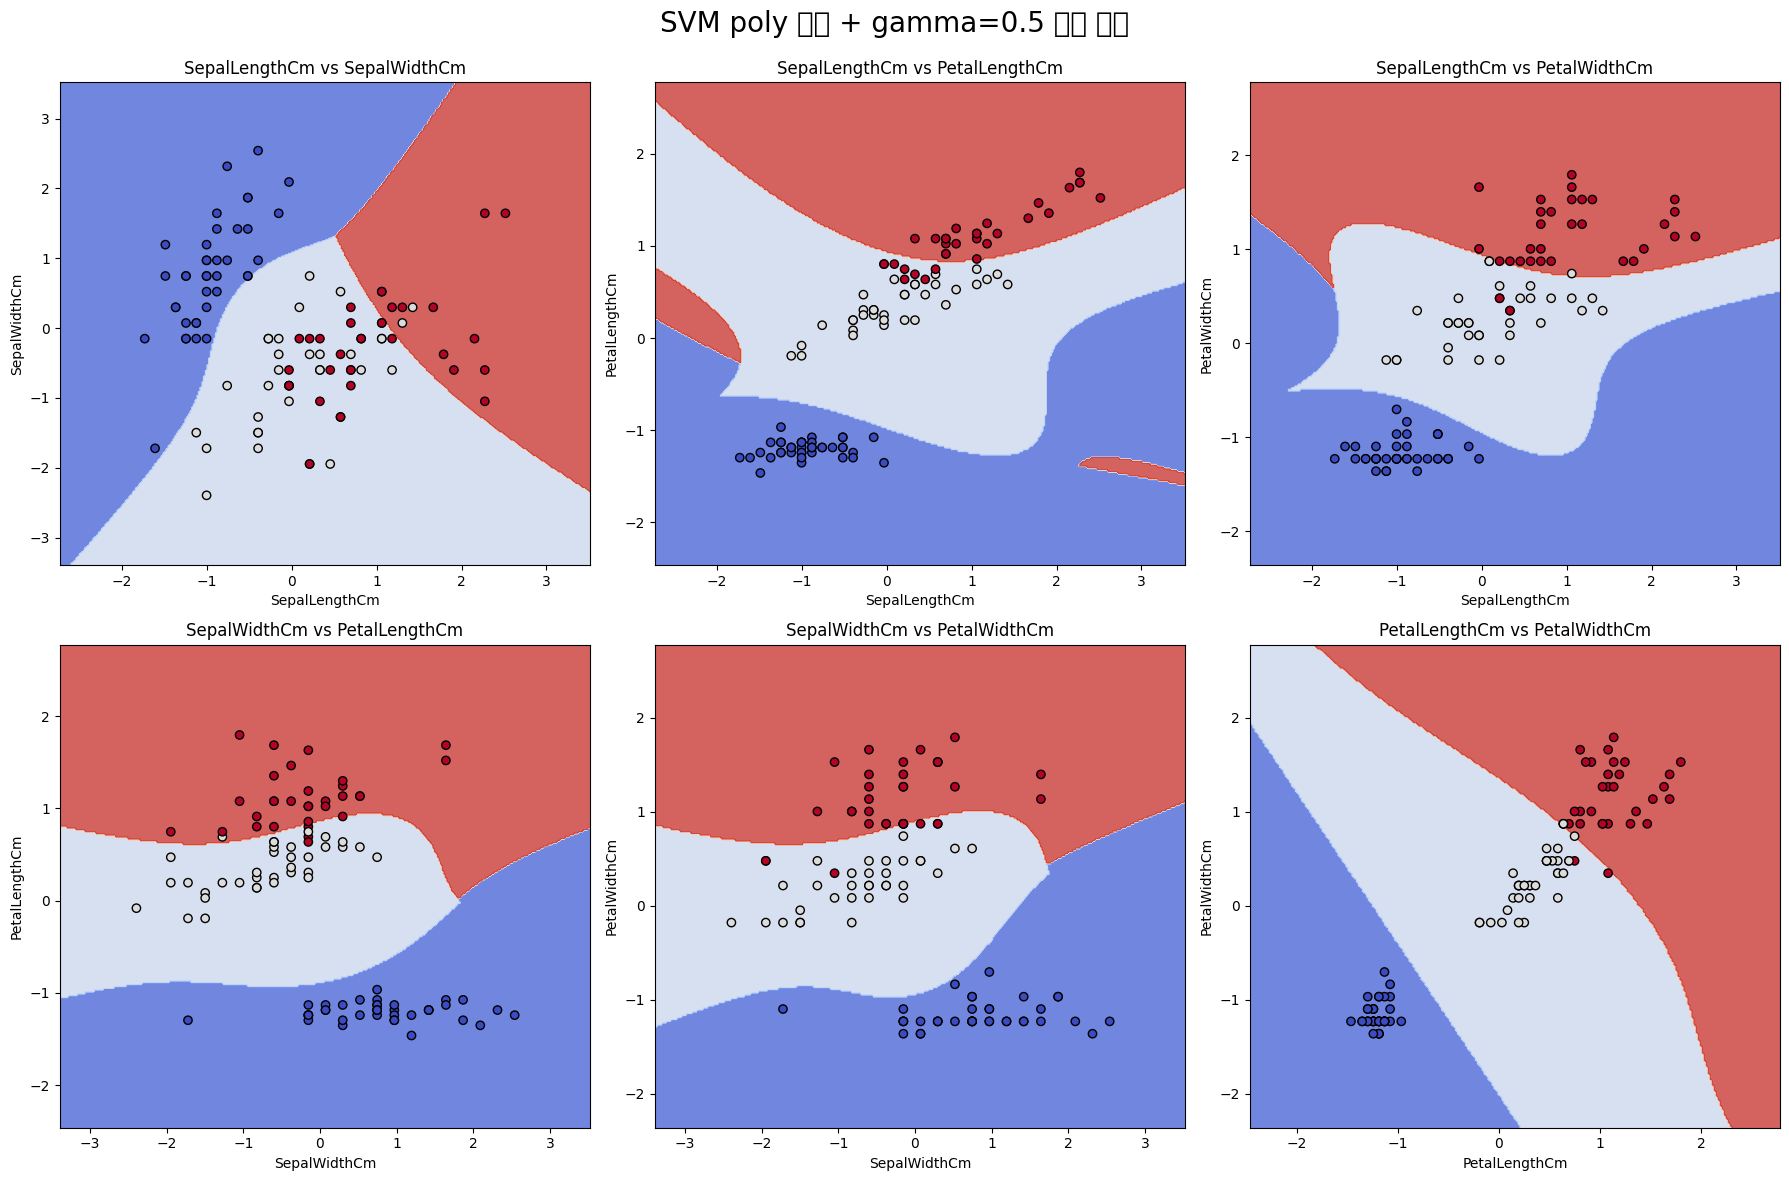

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from itertools import combinations

# 데이터 불러오기
df = pd.read_csv('/content/Iris.csv')
df = df.drop(columns=['Id'])

# 라벨 처리
le = LabelEncoder()
y = le.fit_transform(df['Species'])

# 모든 feature 조합
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
feature_pairs = list(combinations(features, 2))

# 시각화 준비
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, (f1, f2) in enumerate(feature_pairs):
    X = df[[f1, f2]].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=158)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 🎯 여기 gamma 넣음!
    model = SVC(kernel='poly', degree=3, C=3, gamma=0.5)
    model.fit(X_train_scaled, y_train)

    # 결정 경계 계산
    h = .02
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[i].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    axes[i].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_title(f"{f1} vs {f2}")
    axes[i].set_xlabel(f1)
    axes[i].set_ylabel(f2)

plt.suptitle("SVM poly 커널 + gamma=0.5 결정 경계", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

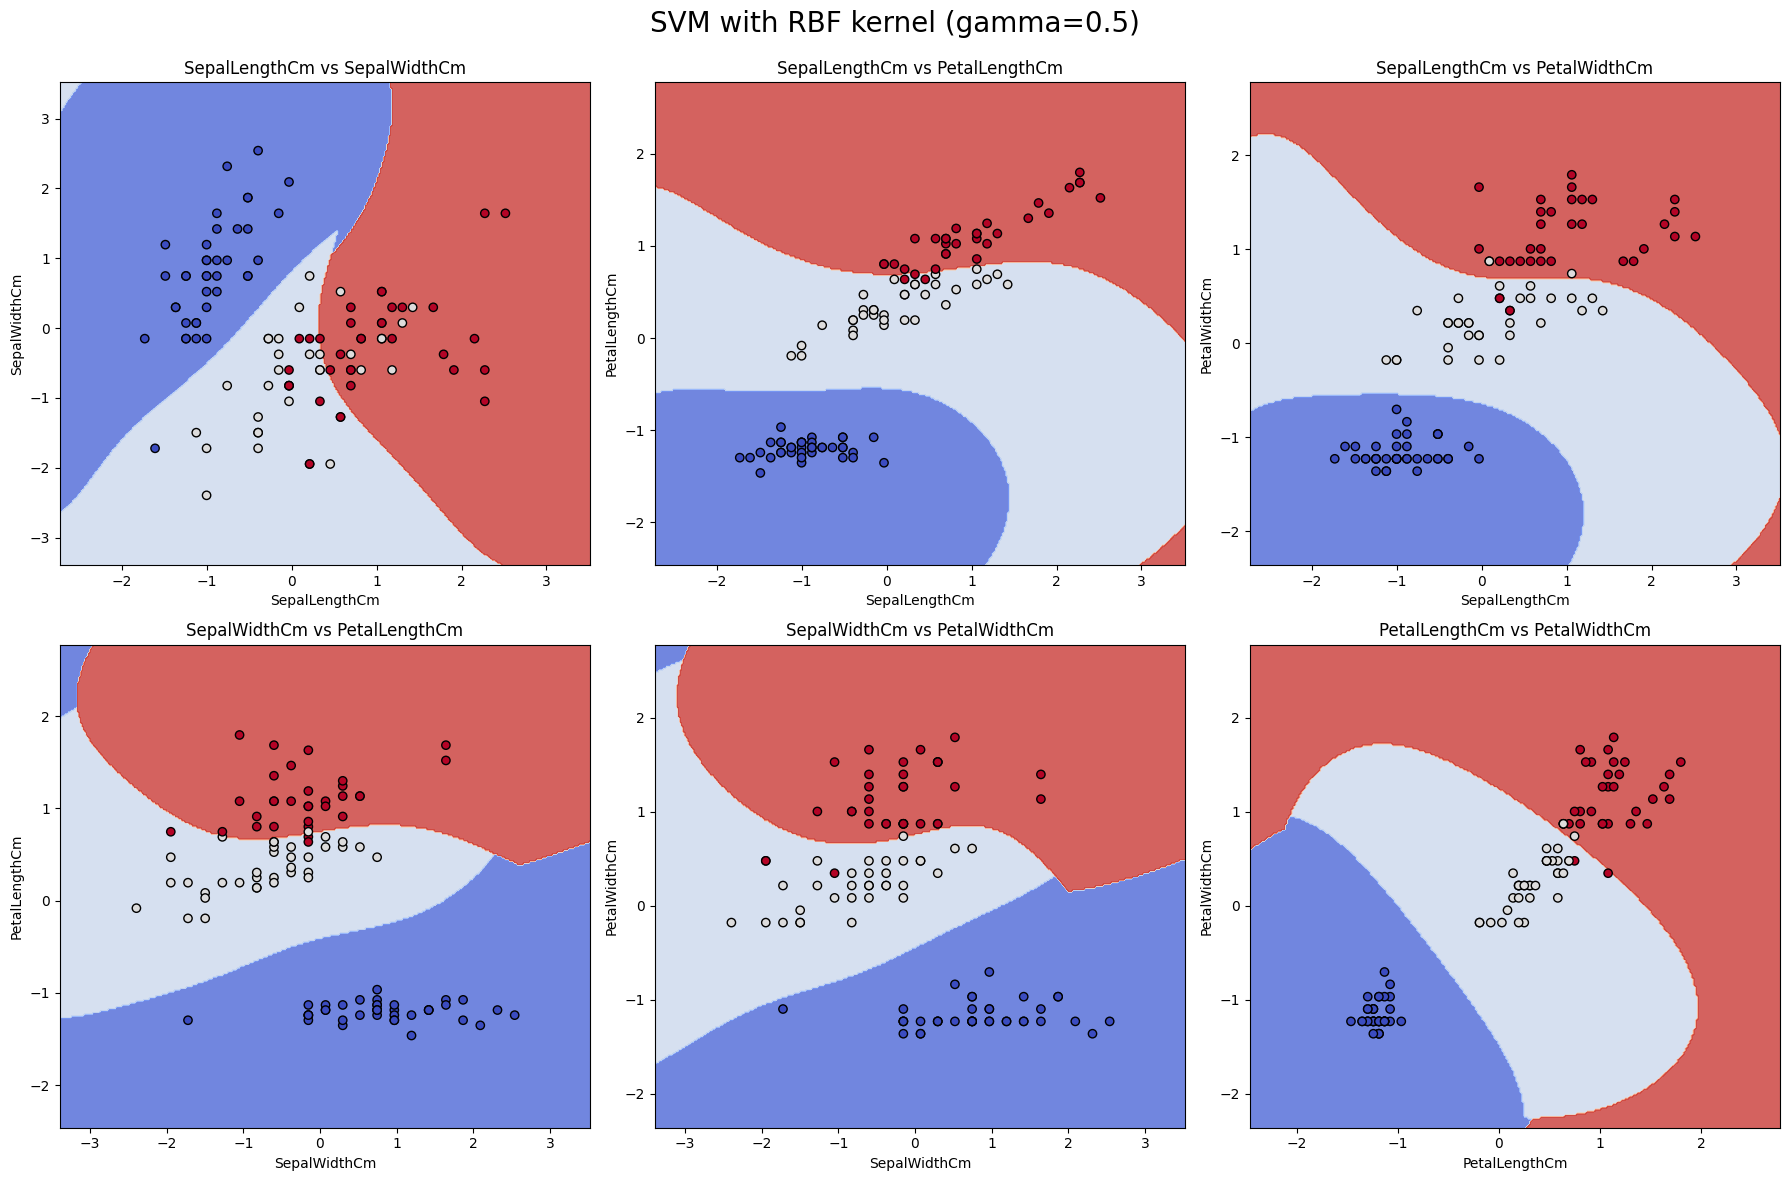

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from itertools import combinations

# 데이터 불러오기
df = pd.read_csv('/content/Iris.csv')
df = df.drop(columns=['Id'])

# 라벨 인코딩
le = LabelEncoder()
y = le.fit_transform(df['Species'])

# 특성 조합 준비
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
feature_pairs = list(combinations(features, 2))

# subplot 준비
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, (f1, f2) in enumerate(feature_pairs):
    X = df[[f1, f2]].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=158)

    # 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 🎯 RBF 커널 + 감마 지정
    model = SVC(kernel='rbf', gamma=0.5, C=1)
    model.fit(X_train_scaled, y_train)

    # 결정 경계
    h = .02
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 시각화
    axes[i].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    axes[i].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_title(f"{f1} vs {f2}")
    axes[i].set_xlabel(f1)
    axes[i].set_ylabel(f2)

plt.suptitle("SVM with RBF kernel (gamma=0.5)", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


<ipython-input-35-736875836f1f>:58: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-736875836f1f>:58: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-736875836f1f>:58: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-736875836f1f>:58: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-736875836f1f>:58: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-736875836f1f>:58: UserWarning: Glyph 46304 (\N{HANGUL SYLLABLE DEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-736875836f1f>:58: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

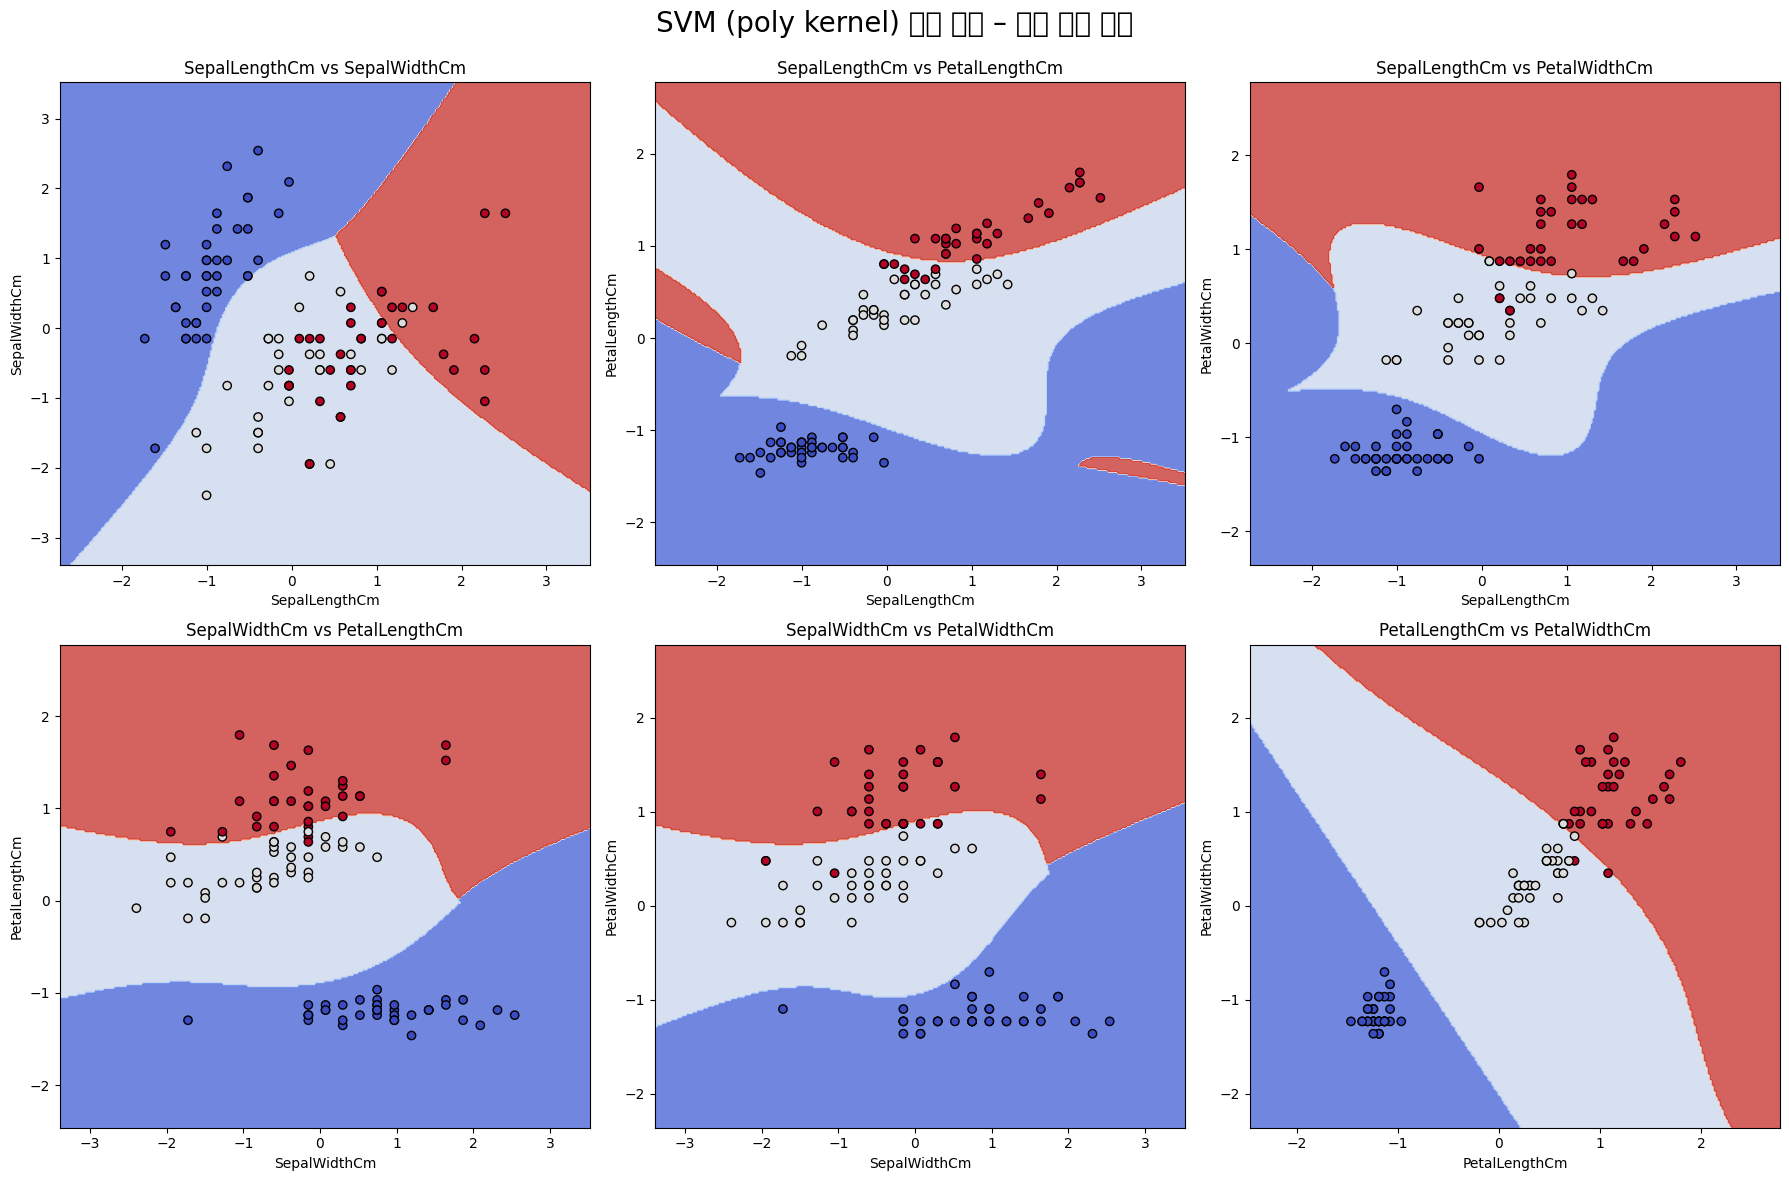

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from itertools import combinations

# 1. 데이터 불러오기
df = pd.read_csv('/content/Iris.csv')
df = df.drop(columns=['Id'])

# 2. 타깃 처리
le = LabelEncoder()
y = le.fit_transform(df['Species'])

# 3. 피처 이름들
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
feature_pairs = list(combinations(features, 2))

# 4. 시각화 반복
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, (f1, f2) in enumerate(feature_pairs):
    X = df[[f1, f2]].values

    # 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=158)

    # 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 모델
    model = SVC(kernel='poly', degree=3, C=3)
    model.fit(X_train_scaled, y_train)

    # 결정 경계용 meshgrid
    h = .02
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 시각화
    axes[i].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    axes[i].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_title(f"{f1} vs {f2}")
    axes[i].set_xlabel(f1)
    axes[i].set_ylabel(f2)

plt.suptitle("SVM (poly kernel) 결정 경계 – 모든 특성 조합", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()
